In [2]:
import pandas as pd
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)
pd.set_option("display.width", 10000)

def load_priorband_data():
    df = pd.read_parquet("data_for_anton.parquet")
    df=df.reset_index()
    df_collection=[]
    for seed_nr in range(50):
        partial_df=df[["benchmark","prior","algorithm","used_fidelity"]]
        partial_df["value"]=df[f"seed-{seed_nr}"]
        partial_df["seed"]=seed_nr
        df_collection.append(partial_df)
        print(f"Seed {seed_nr+1}/50", end="\r", flush=True)
    return pd.concat(df_collection,ignore_index=True)

df=load_priorband_data()

In [3]:
rs_hb_pb=["random_search","hyperband","pb_mutation_dynamic_geometric-default-at-target"]
df_dict={"all":{"all":df}}
df_dict={"all":{"RS+HB+PB":df.loc[(df["algorithm"].isin(rs_hb_pb))]}}
df_dict={"good+bad":{"all":df.loc[(df["prior"]=="good")|(df["prior"]=="bad")]}}
df_dict["good+bad"]["RS+HB+PB"]=df.loc[((df["prior"]=="good")|(df["prior"]=="bad"))&(df["algorithm"].isin(rs_hb_pb))]
for priortype in df["prior"].unique():
    df_dict[priortype]={}
    df_dict[priortype]["all"]=df.loc[df["prior"]==priortype]
    df_dict[priortype]["RS+HB+PB"]=df.loc[(df["prior"]==priortype)&((df["algorithm"].isin(rs_hb_pb)))]

Random Search vs. HyperBand vs. PriorBand on Prior: good+bad 

Bins: [ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13.  14.2 15.4 16.6
 17.8 19.  20.2 21.4 22.6 23.8 25. ]
P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the algorithm and the used_fidelity describes the data as well as the one that does. Therefore there is significant difference within algorithm and the used_fidelity.

P-values adjusted by tukey method for family of 3 estimates
        algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE      DF
1   random_search            1.0_2.2     2.412  -1.083    5.906  1.649  16.111
2       hyperband            1.0_2.2     3.388  -0.103    6.880  1.647  16.028
3       priorband            1.0_2.2     7.526   4.035   11.017  1.647  16.013
4   random_search            2.2_3.4     1.886  -1.613    5.384  1.652  16.227
5       hyperband            2.2_3.4     2.400  -1.093    5.893  1.648  1

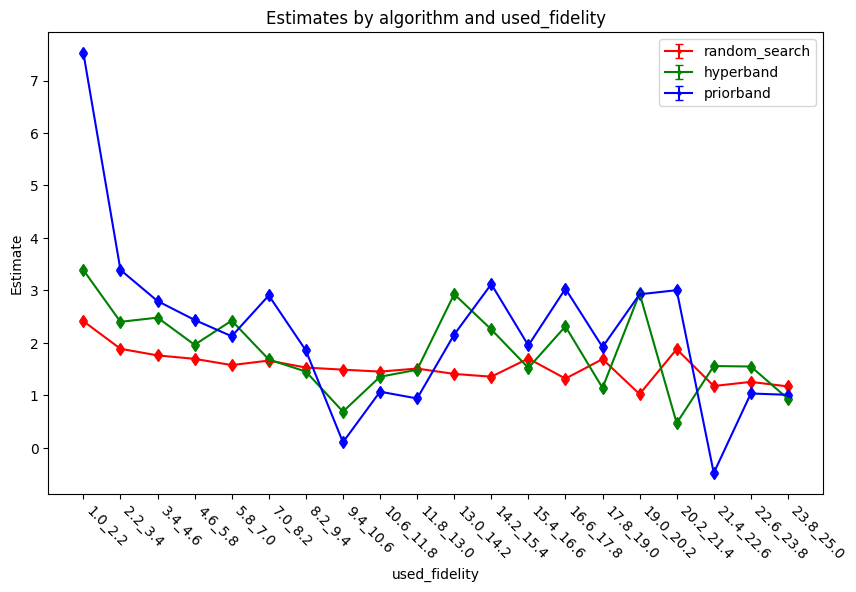

Random Search vs. HyperBand vs. PriorBand on Prior: good 

Bins: [ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13.  14.2 15.4 16.6
 17.8 19.  20.2 21.4 22.6 23.8 25. ]
P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the algorithm and the used_fidelity describes the data as well as the one that does. Therefore there is significant difference within algorithm and the used_fidelity.

P-values adjusted by tukey method for family of 3 estimates
        algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE     DF
1   random_search            1.0_2.2    -0.053  -1.008    0.901  0.414  8.033
2       hyperband            1.0_2.2     0.335  -0.620    1.289  0.414  8.009
3       priorband            1.0_2.2    -0.740  -1.695    0.216  0.416  8.138
4   random_search            2.2_3.4    -0.298  -1.253    0.657  0.415  8.068
5       hyperband            2.2_3.4    -0.431  -1.385    0.524  0.414  8.025
6   

c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\pandas\core\internals\blocks.py:1491: RuntimeWarning: invalid value encountered in multiply
  values = self.values.round(decimals)  # type: ignore[union-attr]


    algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE     DF
2   hyperband            1.0_2.2     0.335  -0.620    1.289  0.414  8.009
5   hyperband            2.2_3.4    -0.431  -1.385    0.524  0.414  8.025
8   hyperband            3.4_4.6    -0.474  -1.428    0.481  0.414  8.022
11  hyperband            4.6_5.8    -0.715  -1.670    0.240  0.414  8.038
14  hyperband            5.8_7.0    -0.649  -1.604    0.305  0.414  8.034
17  hyperband            7.0_8.2    -0.804  -1.759    0.151  0.414  8.042
20  hyperband            8.2_9.4    -0.781  -1.736    0.174  0.415  8.068
23  hyperband           9.4_10.6    -0.883  -1.837    0.072  0.415  8.049
26  hyperband          10.6_11.8    -0.869  -1.824    0.086  0.415  8.060
29  hyperband          11.8_13.0    -0.905  -1.860    0.050  0.415  8.068
32  hyperband          13.0_14.2    -0.790  -1.745    0.166  0.415  8.111
35  hyperband          14.2_15.4    -0.912  -1.867    0.043  0.414  8.039
38  hyperband          15.4_16.6    -0

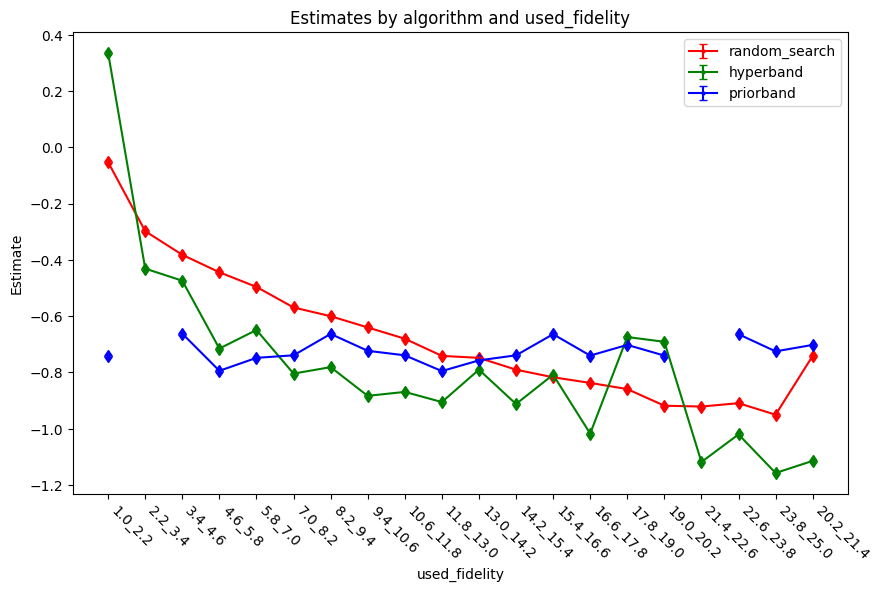

Random Search vs. HyperBand vs. PriorBand on Prior: bad 

Bins: [ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13.  14.2 15.4 16.6
 17.8 19.  20.2 21.4 22.6 23.8 25. ]
P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the algorithm and the used_fidelity describes the data as well as the one that does. Therefore there is significant difference within algorithm and the used_fidelity.

P-values adjusted by tukey method for family of 3 estimates
        algorithm used_fidelity_bins  Estimate  2.5_ci  97.5_ci     SE      DF
1   random_search            1.0_2.2     2.222  -1.291    5.736  1.659  16.215
2       hyperband            1.0_2.2     3.501  -0.007    7.009  1.655  16.058
3       priorband            1.0_2.2     7.637   4.130   11.143  1.654  16.020
4   random_search            2.2_3.4     1.556  -1.966    5.078  1.665  16.435
5       hyperband            2.2_3.4     2.391  -1.119    5.902  1.657  16.120

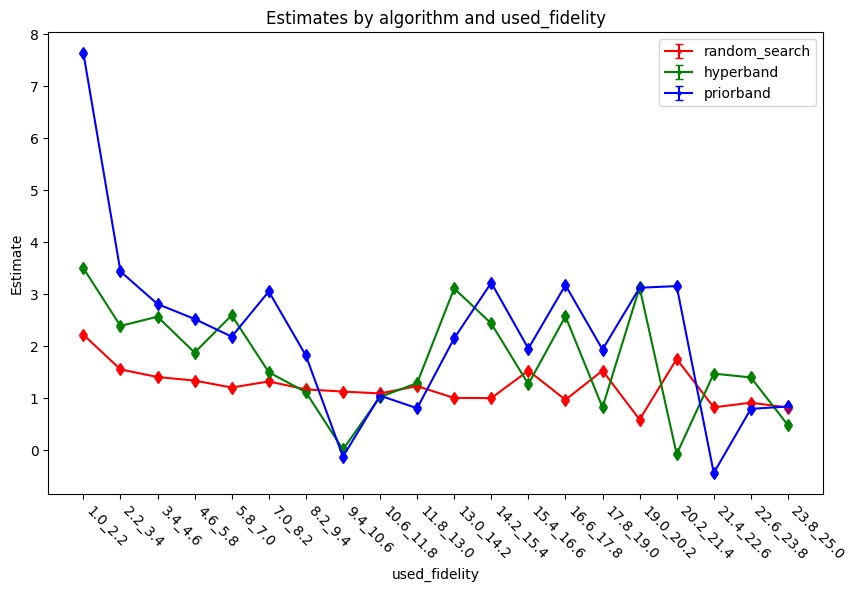

In [4]:
from significance_analysis import conduct_analysis

result_dict={}
for priortype in ["good+bad","good","bad"]:
    print(f"Random Search vs. HyperBand vs. PriorBand on Prior: {priortype} \n")
    df_dict[priortype]["RS+HB+PB"].loc[df_dict[priortype]["RS+HB+PB"]["algorithm"]=='pb_mutation_dynamic_geometric-default-at-target',"algorithm"]="priorband"
    # result_dict[priortype]=conduct_analysis(df_dict[priortype]["RS+HB+PB"],"value","algorithm","benchmark",show_plots=False)
    result_dict[priortype]=conduct_analysis(df_dict[priortype]["RS+HB+PB"].loc[(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]>=1)&(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]<=25)],"value","algorithm","benchmark",continuous_fidelity=False,show_plots=True,bin_id="used_fidelity",bins=20)


#Also do for prior as budget

In [15]:
import numpy as np
steps=15
min_f=1
max_f=25.2
results_quantized={}
for priortype in ["good+bad","good","bad"]:
    results_quantized[priortype]={}
    linspace=np.quantile(df_dict[priortype]["RS+HB+PB"].loc[(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]>=min_f)&(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]<=max_f)]["used_fidelity"],np.linspace(0,1,num=steps,endpoint=True))
    for n,f in enumerate(linspace[:-1]):
        df_at_fidelity=df_dict[priortype]["RS+HB+PB"].loc[(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]>=f)&(df_dict[priortype]["RS+HB+PB"]["used_fidelity"]<=linspace[n+1])]
        print(df_at_fidelity)
        passed=True
        for system in df_at_fidelity.columns:
            if len(df_at_fidelity[system])<5:
                passed=False
        if passed:
            results_quantized[priortype][f]=conduct_analysis(df_at_fidelity,"value","algorithm","benchmark",verbosity=0,continuous_fidelity=False,show_plots=False)[1][0]
        print(f"{priortype}, {round(f,4)},{round(linspace[n+1],4)}           ")#,end="\r",flush=True)

                        benchmark prior      algorithm  used_fidelity     value  seed
2891               lcbench-167190   bad  random_search       1.000000  0.224055     0
3179               lcbench-167190   bad      hyperband       1.057692  0.216327     0
3180               lcbench-167190   bad      hyperband       1.134615  0.216327     0
3222               lcbench-167190   bad      priorband       1.000000  0.521580     0
3223               lcbench-167190   bad      priorband       1.019231  0.445254     0
...                           ...   ...            ...            ...       ...   ...
4570770       imagenet_resnet_512   bad      priorband       1.090909  0.710897    49
4570771       imagenet_resnet_512   bad      priorband       1.121212  0.710897    49
4570772       imagenet_resnet_512   bad      priorband       1.151515  0.710897    49
4571219  cifar100_wideresnet_2048  good  random_search       1.000000  0.971378    49
4571301  cifar100_wideresnet_2048  good      priorband

In [23]:
scores={}
for n_prior,priortype in enumerate(results_quantized.keys()):
    fidelities_steps=list(results_quantized[priortype].keys())
    scores[priortype]={}
    for system in list(results_quantized[priortype][fidelities_steps[0]]["algorithm"].unique()):
        scores[priortype][system]=[]
    print(scores)
    for n_f,f in enumerate(fidelities_steps):
        # print(priortype,len(df_dict_autorank_fidelities[priortype][f]))
        print(f"Prior {n_prior+1}/{len(results_quantized.keys())}: Fidelity {n_f+1}/{len(fidelities_steps)}  ",end="\r",flush=True)
        result_frame=results_quantized[priortype][f]
        for row in result_frame:
            print(row)
            scores[priortype][str(row["algorithm"][0])].append(row["Estimate"])
            # print(len(scores[priortype][system]))

{'good+bad': {'random_search': [], 'hyperband': [], 'priorband': []}}
algorithm


TypeError: string indices must be integers

In [ ]:
color_dict={"random_search":"red","hyperband":"green","pb_mutation_dynamic_geometric-default-at-target":"blue","priorband":"blue"}
import matplotlib.pyplot as plt
for priortype in scores.keys():
    _, axis = plt.subplots(figsize=(10, 6))
    for system in scores[priortype]:
        axis.errorbar(
            fidelities_steps,
            scores[priortype][system],
            fmt="o-",
            capsize=3,
            label=system,
            color=color_dict[system]
        )
    axis.set_xlabel("time/cost/fidelity")
    axis.set_ylabel("meanrank")
    axis.set_title(f"{priortype} prior")
    axis.legend()
plt.show()